# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [59]:
import seaborn as sns

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# load datasets

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [3]:
df_08.fuel.value_counts()

Gasoline    984
ethanol       1
gas           1
CNG           1
Name: fuel, dtype: int64

In [4]:
df_08.query('fuel != "Gasoline"')

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
388,HONDA Civic,1.8,4,Auto-L5,2WD,CNG,small car,9.5,24.0,36.0,28.0,9,yes
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,15.0,7,no
986,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4.0,18.0,25.0,21.0,6,no


In [5]:
df_18.query('fuel != "Gasoline"').drop_duplicates(subset='model').count()

model                   37
displ                   37
cyl                     37
trans                   37
drive                   37
fuel                    37
veh_class               37
air_pollution_score     37
city_mpg                37
hwy_mpg                 37
cmb_mpg                 37
greenhouse_gas_score    37
smartway                37
dtype: int64

In [6]:
df_08.query('fuel != "Gasoline"').count() 

model                   3
displ                   3
cyl                     3
trans                   3
drive                   3
fuel                    3
veh_class               3
air_pollution_score     3
city_mpg                3
hwy_mpg                 3
cmb_mpg                 3
greenhouse_gas_score    3
smartway                3
dtype: int64

In [7]:
df_18.fuel.value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [8]:
df_18.shape[0]

832

### Q2: How much have vehicle classes improved in fuel economy?  

In [11]:
df_08_gb_vc = df_08.drop(['displ','cyl','air_pollution_score','greenhouse_gas_score'], axis=1).groupby('veh_class').mean()
df_08_gb_vc

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
SUV,16.507143,21.935714,18.471429
large car,15.836364,23.345455,18.509091
midsize car,18.826087,26.565217,21.601449
minivan,16.882353,23.705882,19.117647
pickup,14.578313,19.204819,16.277108
small car,18.372372,25.963964,21.105105
station wagon,19.633333,27.116667,22.366667
van,13.142857,17.333333,14.952381


In [12]:
df_18_gb_vc = df_18.drop(['displ','cyl','air_pollution_score','greenhouse_gas_score'], axis=1).groupby('veh_class').mean()
df_18_gb_vc

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
large car,20.420455,28.795455,23.409091
midsize car,24.862319,33.057971,27.884058
minivan,18.000000,25.400000,20.800000
pickup,16.551282,22.012821,18.589744
small SUV,21.666667,27.879630,24.074074
small car,22.561404,30.435088,25.421053
special purpose,16.600000,21.300000,18.500000
standard SUV,16.011628,21.953488,18.197674
station wagon,24.705882,32.058824,27.529412


In [13]:
matching_indices = df_08_gb_vc.index.intersection(df_18_gb_vc.index)
df_18_gb_vc[df_18_gb_vc.index.isin(matching_indices)] - df_08_gb_vc[df_08_gb_vc.index.isin(matching_indices)] 

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
large car,4.584091,5.450000,4.900000
midsize car,6.036232,6.492754,6.282609
minivan,1.117647,1.694118,1.682353
pickup,1.972969,2.808001,2.312635
small car,4.189031,4.471124,4.315948
station wagon,5.072549,4.942157,5.162745


In [14]:
df_08_gb_vc[df_08_gb_vc.index.str.contains('SUV')]

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
SUV,16.507143,21.935714,18.471429


In [15]:
df_18_gb_vc[df_18_gb_vc.index.str.contains('SUV')]

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
small SUV,21.666667,27.879630,24.074074
standard SUV,16.011628,21.953488,18.197674


In [16]:
df_18_gb_suv =  df_18_gb_vc.query("veh_class == 'standard SUV'").rename(index={'standard SUV' : 'SUV'})
df_18_gb_suv - df_08_gb_vc[df_08_gb_vc.index.str.contains('SUV')]

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
SUV,-0.495515,0.017774,-0.273754


In [17]:
ser_18_gb_vc_SUV_mean = df_18_gb_vc[df_18_gb_vc.index.str.contains('SUV')].mean(axis=0)
df_18_mean_SUV = pd.DataFrame(ser_18_gb_vc_SUV_mean).transpose()
df_18_mean_SUV.index.name = 'veh_class'
df_18_mean_SUV.rename(index={0:'SUV'}, inplace=True)
df_18_mean_SUV - df_08_gb_vc[df_08_gb_vc.index.str.contains('SUV')]

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
SUV,2.332004,2.980845,2.664446


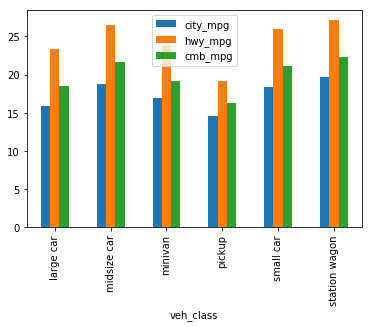

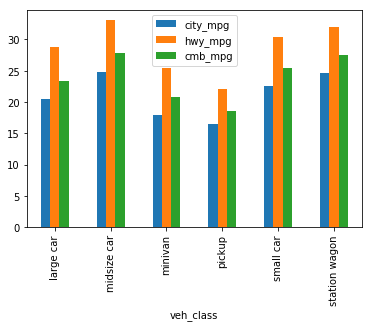

In [24]:
df_08_gb_vc[df_08_gb_vc.index.isin(matching_indices)].plot.bar();

df_18_gb_vc[df_18_gb_vc.index.isin(matching_indices)].plot.bar();

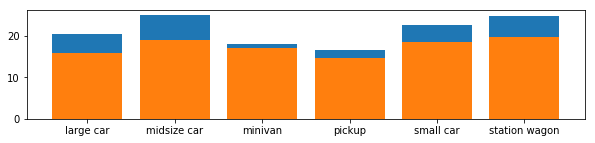

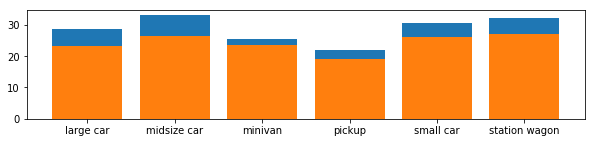

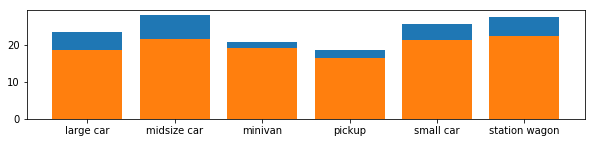

In [90]:
from matplotlib.pyplot import figure
figure(figsize=(10, 2))
#df_08_gb_vc[df_08_gb_vc.index == 'large car'].plot.bar();
#df_18_gb_vc[df_18_gb_vc.index == 'large car'].plot.bar();

t1 = df_08_gb_vc[df_08_gb_vc.index.isin(matching_indices)] 
#[df_08_gb_vc.index == 'large car']
t2 = df_18_gb_vc[df_18_gb_vc.index.isin(matching_indices)]
#[df_18_gb_vc.index == 'large car']

plt.bar(t2.index, t2.city_mpg);
plt.bar(t1.index, t1.city_mpg);

plt.show()
figure(figsize=(10, 2))
plt.bar(t2.index, t2.hwy_mpg);
plt.bar(t1.index, t1.hwy_mpg);

plt.show()
figure(figsize=(10, 2))
plt.bar(t2.index, t2.cmb_mpg);
plt.bar(t1.index, t1.cmb_mpg);


#sns.barplot(x=t1.index, y=t2.columns.values);
#sns.barplot(x=t2.index');
#t2.index.values
#t2.columns.values
#plt.bar(t2.index, t2);
#plt.bar(t1.index, t1.cmb_mpg);

In [70]:
t1

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
large car,15.836364,23.345455,18.509091
midsize car,18.826087,26.565217,21.601449
minivan,16.882353,23.705882,19.117647
pickup,14.578313,19.204819,16.277108
small car,18.372372,25.963964,21.105105
station wagon,19.633333,27.116667,22.366667


### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [19]:
df_08.query('smartway != "no"').plot.scatter_matrix()

AttributeError: 'FramePlotMethods' object has no attribute 'scatter_matrix'

In [ ]:
#

### Q4: What features are associated with better fuel economy?